In [159]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import gdown

In [160]:
url = 'https://drive.google.com/uc?id=1eDxK0U8NMbdp3j8J7_a-R6EffvwXg7Dv'
gdown.download(url, 'data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1eDxK0U8NMbdp3j8J7_a-R6EffvwXg7Dv
To: d:\Project\Supply Chain Management\model-lstm\data.csv
100%|██████████| 2.97M/2.97M [00:00<00:00, 5.15MB/s]


'data.csv'

In [161]:
df = pd.read_csv('data.csv')
df

,id,date,raw_material_id,name,category,purchase_type,stock_used,unit,current_stock
0,1,2025-03-23,RM019,Daging Ayam,Daging,daily,805,gram,4329
1,2,2025-01-28,RM003,Gula Pasir,Gula,bulk,233,gram,2839
2,3,2025-04-12,RM019,Daging Ayam,Daging,daily,951,gram,4173
3,4,2025-05-04,RM010,Cokelat Bubuk,Cokelat,bulk,292,gram,4214
4,5,2025-02-06,RM019,Daging Ayam,Daging,daily,846,gram,1683
...,...,...,...,...,...,...,...,...,...
49996,49997,2025-03-12,RM004,Sirup Vanilla,Sirup,bulk,871,ml,3090
49997,49998,2025-03-19,RM006,Matcha Powder,Teh,bulk,90,gram,686
49998,49999,2025-05-16,RM007,Espresso Blend,Kopi,bulk,443,gram,4705
49999,50000,2025-05-13,RM009,Whipping Cream,Susu,bulk,698,ml,2395


In [162]:
df['date'] = pd.to_datetime(df['date'])

In [163]:
df.isna().sum()

id                 0
date               0
raw_material_id    0
name               0
category           0
purchase_type      0
stock_used         0
unit               0
current_stock      0
dtype: int64

In [164]:
df.duplicated().sum()

np.int64(0)

In [165]:
# Filter dan sort
df = df[df['purchase_type'] == 'bulk'].copy()
df = df.sort_values(by=['name', 'date'])

In [166]:
df

,id,date,raw_material_id,name,category,purchase_type,stock_used,unit,current_stock
3171,3172,2025-01-01,RM008,Air Mineral,Air,bulk,287,ml,856
3656,3657,2025-01-01,RM008,Air Mineral,Air,bulk,389,ml,2125
4259,4260,2025-01-01,RM008,Air Mineral,Air,bulk,88,ml,1582
4771,4772,2025-01-01,RM008,Air Mineral,Air,bulk,169,ml,2082
12777,12778,2025-01-01,RM008,Air Mineral,Air,bulk,496,ml,4382
...,...,...,...,...,...,...,...,...,...
33420,33421,2025-05-21,RM009,Whipping Cream,Susu,bulk,59,ml,923
35787,35788,2025-05-21,RM009,Whipping Cream,Susu,bulk,283,ml,809
38951,38952,2025-05-21,RM009,Whipping Cream,Susu,bulk,937,ml,2249
41467,41468,2025-05-21,RM009,Whipping Cream,Susu,bulk,94,ml,2571


Epoch 1/100


C:\Users\hariy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6168 - mae: 0.7717 - val_loss: 0.4456 - val_mae: 0.5848
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.5981 - mae: 0.7589 - val_loss: 0.4282 - val_mae: 0.5751
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.5806 - mae: 0.7467 - val_loss: 0.4116 - val_mae: 0.5657
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.5394 - mae: 0.7175 - val_loss: 0.3955 - val_mae: 0.5561
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.5217 - mae: 0.7060 - val_loss: 0.3796 - val_mae: 0.5460
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4979 - mae: 0.6835 - val_loss: 0.3641 - val_mae: 0.5355
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4770 - mae: 0.6679 - val_loss: 0.3487 - val_mae: 0.5245
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.4555 - mae: 0.6477 - val_loss: 0.3336 - val_mae: 0.5127
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.4109 - mae: 0.6108 - val_l

C:\Users\hariy\AppData\Local\Temp\ipykernel_37776\94100963.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hariy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


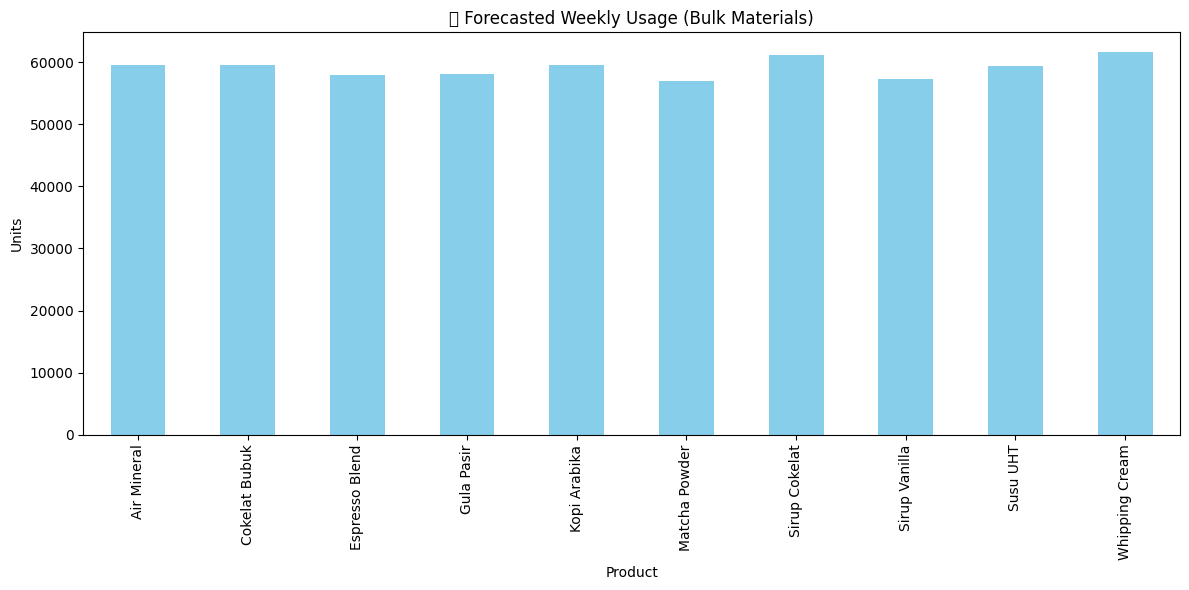

In [167]:
# Buat kolom minggu
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Agregasi mingguan
weekly = df.groupby(['week', 'name'])['stock_used'].sum().unstack().fillna(0)

# Normalisasi per produk
scalers = {}
scaled_weekly = weekly.copy()
for col in weekly.columns:
    scaler = MinMaxScaler()
    scaled_weekly[col] = scaler.fit_transform(weekly[[col]])
    scalers[col] = scaler

# Buat data sequence
def create_sequences(data, window_size=4):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_weekly)

# Bangun model LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(X.shape[2])
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X, y, epochs=100, batch_size=16, validation_split=0.2, verbose=1)
model.save("lstm_model.keras")

# Prediksi minggu berikutnya
last_sequence = scaled_weekly[-4:].values
forecast_input = np.expand_dims(last_sequence, axis=0)
forecast_scaled = model.predict(forecast_input)[0]

# Inverse transform hasil forecast
forecast = {
    col: scalers[col].inverse_transform([[forecast_scaled[i]]])[0][0]
    for i, col in enumerate(weekly.columns)
}

# DataFrame hasil forecast
forecast_df = pd.DataFrame({
    'Product': list(forecast.keys()),
    'Forecasted Usage (Next 7 Days)': list(forecast.values())
})

# Ambil stok terakhir dari masing-masing produk
latest_date = df['date'].max()
latest_stock = df[df['date'] == latest_date].drop_duplicates('name')[['name', 'current_stock']]
forecast_df = forecast_df.merge(latest_stock, left_on='Product', right_on='name', how='left')

# Tambahkan safety stock, reorder level, dan jumlah yang perlu dipesan
forecast_df['Forecasted Usage (Next 7 Days)'] = forecast_df['Forecasted Usage (Next 7 Days)'].fillna(0)
forecast_df['current_stock'] = forecast_df['current_stock'].fillna(0)

forecast_df['Safety Stock'] = forecast_df['Forecasted Usage (Next 7 Days)'] * 0.2
forecast_df['Reorder Level'] = forecast_df['Forecasted Usage (Next 7 Days)'] + forecast_df['Safety Stock']
forecast_df['Stock to Order'] = forecast_df['Reorder Level'] - forecast_df['current_stock']
forecast_df['Stock to Order'] = forecast_df['Stock to Order'].apply(lambda x: max(0, round(x)) if pd.notnull(x) else 0)

# Tampilkan hasil akhir
result = forecast_df[['Product', 'Forecasted Usage (Next 7 Days)', 'current_stock', 'Safety Stock', 'Reorder Level', 'Stock to Order']]
print(result)

# Visualisasi
result.set_index('Product')['Forecasted Usage (Next 7 Days)'].plot(
    kind='bar',
    figsize=(12, 6),
    title='📊 Forecasted Weekly Usage (Bulk Materials)',
    color='skyblue'
)
plt.ylabel('Units')
plt.tight_layout()
plt.show()


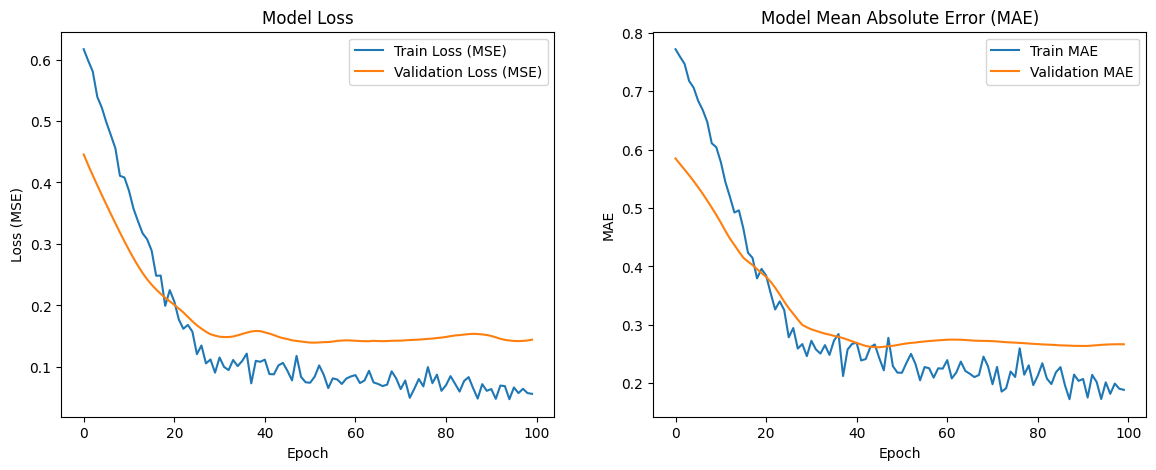

Model evaluation on full data -> Loss (MSE): 0.0498, MAE: 0.1519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
MAE: 0.1519, RMSE: 0.2231


In [168]:
# 1. Plot grafik loss & MAE selama training
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 2. Evaluasi model di data yang sudah ada (contoh di seluruh data X,y)
loss, mae = model.evaluate(X, y, verbose=0)
print(f"Model evaluation on full data -> Loss (MSE): {loss:.4f}, MAE: {mae:.4f}")

# 3. Contoh hitung MAE dan RMSE dari prediksi model di seluruh data X
y_pred = model.predict(X)
mae_val = mean_absolute_error(y, y_pred)
rmse_val = np.sqrt(mean_squared_error(y, y_pred))
print(f"MAE: {mae_val:.4f}, RMSE: {rmse_val:.4f}")
